# Tarea 8

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import dataset
dataset = pd.read_csv('abulones.csv')
#Print number of observations and features
print('This dataset has {} observations with {} features.'.format(dataset.shape[0], dataset.shape[1]))
#Check for null values
dataset.info()

This dataset has 3320 observations with 5 features.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Length        3320 non-null   float64
 1   Diameter      3320 non-null   float64
 2   Height        3320 non-null   float64
 3   Whole weight  3320 non-null   float64
 4   Age           3320 non-null   object 
dtypes: float64(4), object(1)
memory usage: 129.8+ KB


In [3]:
dataset[:7]

,Length,Diameter,Height,Whole weight,Age
0,0.435,0.335,0.110,0.334,seven
1,0.585,0.450,0.125,0.874,six
2,0.655,0.510,0.160,1.092,fourteen
3,0.545,0.425,0.125,0.768,sixteen
4,0.545,0.420,0.130,0.879,thirteen
5,0.570,0.450,0.145,0.751,ten
6,0.470,0.360,0.130,0.472,ten


## a) Cambia los datos de la columna edad a un formato numérico.

In [4]:
from word2number import w2n

In [5]:
def to_number(x):
    return w2n.word_to_num(x)

In [6]:
dataset['Age'] = dataset['Age'].apply(to_number)
dataset[:7]

,Length,Diameter,Height,Whole weight,Age
0,0.435,0.335,0.110,0.334,7
1,0.585,0.450,0.125,0.874,6
2,0.655,0.510,0.160,1.092,14
3,0.545,0.425,0.125,0.768,16
4,0.545,0.420,0.130,0.879,13
5,0.570,0.450,0.145,0.751,10
6,0.470,0.360,0.130,0.472,10


## b) Diseña una red neuronal... Grafica la pérdida de training y testingcon respecto alas épocas.

### Separar los datos

In [7]:
dataset = dataset[['Length', 'Diameter', 'Height', 'Age', 'Whole weight']]

#Separate input data and labels
X = dataset.iloc[:,0:4] 
y = dataset.iloc[:, 4].values

#Split data into training and testing 
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Contruir el modelo

In [8]:
#Build Keras Model
 
import keras
from keras import Sequential
from keras.layers import Dense
from keras import optimizers
 
model = Sequential()
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1,activation='linear'))
sgd = optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd, loss='mean_squared_error',  metrics=['mae','mse'])
  
history=model.fit(X_train,y_train,batch_size=32, validation_split = 0.2, epochs=10)
 
# Model summary for number of parameters use in the algorithm
model.summary()

Epoch 1/10
67/67 [==============================] - 19s 8ms/step - loss: 0.2069 - mae: 0.3643 - mse: 0.2069 - val_loss: 0.1673 - val_mae: 0.3384 - val_mse: 0.1673
Epoch 2/10
67/67 [==============================] - 0s 1ms/step - loss: 0.1805 - mae: 0.3376 - mse: 0.1805 - val_loss: 0.1657 - val_mae: 0.3318 - val_mse: 0.1657
Epoch 3/10
67/67 [==============================] - 0s 1ms/step - loss: 0.1715 - mae: 0.3303 - mse: 0.1715 - val_loss: 0.1466 - val_mae: 0.3147 - val_mse: 0.1466
Epoch 4/10
67/67 [==============================] - 0s 1ms/step - loss: 0.1641 - mae: 0.3253 - mse: 0.1641 - val_loss: 0.1466 - val_mae: 0.3197 - val_mse: 0.1466
Epoch 5/10
67/67 [==============================] - 0s 1ms/step - loss: 0.1673 - mae: 0.3229 - mse: 0.1673 - val_loss: 0.1655 - val_mae: 0.3400 - val_mse: 0.1655
Epoch 6/10
67/67 [==============================] - 0s 1ms/step - loss: 0.1678 - mae: 0.3278 - mse: 0.1678 - val_loss: 0.1426 - val_mae: 0.3130 - val_mse: 0.1426
Epoch 7/10
67/67 [=========

### Gráfica

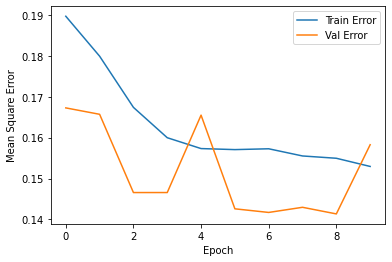

In [9]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()

plot_history(history)

In [10]:
test_entry = X_test[:1]

In [11]:
#Predict testing labels
 
y_pred= model.predict(X_test)
 
#undo normalization 
 
#y_pred_transformed=scalar.inverse_transform(y_pred.reshape(-1,1))
#y_test_transformed=scalar.inverse_transform(y_test)

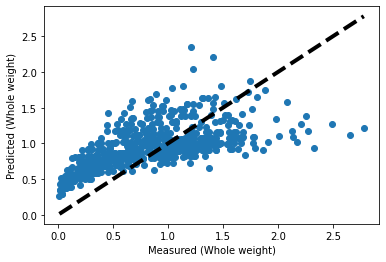

In [12]:
#visualize performance
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured (Whole weight)')
ax.set_ylabel('Predicted (Whole weight)')
plt.show()
 
#Calculate RMSE and R^2
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
 
from sklearn.metrics import r2_score
r_squared=r2_score(y_test,y_pred)

## c) Los datos en abulones.csv no se encuentran normalizados. Agrega una capa de normalización a tu modelo y compara los resultados obtenidos cuando los datos no estaban normalizados.

In [13]:
#Normalize the data using the min-max scalar

test = X_test
train = X_train
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler()
X= scalar.fit_transform(X)
y= y.reshape(-1,1)
y=scalar.fit_transform(y)

In [14]:
#Split data into training and testing 
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
#Build Keras Model
 
import keras
from keras import Sequential
from keras.layers import Dense
from keras import optimizers
 
model = Sequential()
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1,activation='linear'))
sgd = optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd, loss='mean_squared_error',  metrics=['mae','mse'])
  
history=model.fit(X_train,y_train,batch_size=32, validation_split = 0.2, epochs=10)
 
# Model summary for number of parameters use in the algorithm
model.summary()

Epoch 1/10
67/67 [==============================] - 1s 5ms/step - loss: 0.1285 - mae: 0.3051 - mse: 0.1285 - val_loss: 0.0838 - val_mae: 0.2332 - val_mse: 0.0838
Epoch 2/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0736 - mae: 0.2149 - mse: 0.0736 - val_loss: 0.0512 - val_mae: 0.1742 - val_mse: 0.0512
Epoch 3/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0457 - mae: 0.1668 - mse: 0.0457 - val_loss: 0.0360 - val_mae: 0.1451 - val_mse: 0.0360
Epoch 4/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0338 - mae: 0.1423 - mse: 0.0338 - val_loss: 0.0287 - val_mae: 0.1316 - val_mse: 0.0287
Epoch 5/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0264 - mae: 0.1283 - mse: 0.0264 - val_loss: 0.0252 - val_mae: 0.1254 - val_mse: 0.0252
Epoch 6/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0242 - mae: 0.1245 - mse: 0.0242 - val_loss: 0.0234 - val_mae: 0.1223 - val_mse: 0.0234
Epoch 7/10
67/67 [==========

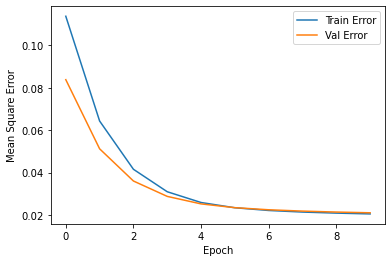

In [16]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()

plot_history(history)

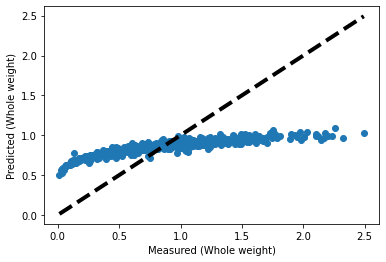

In [17]:
#Predict testing labels
 
y_pred= model.predict(X_test)
 
#undo normalization 
 
y_pred_transformed=scalar.inverse_transform(y_pred.reshape(-1,1))
y_test_transformed=scalar.inverse_transform(y_test)

#visualize performance
fig, ax = plt.subplots()
ax.scatter(y_test_transformed, y_pred_transformed)
ax.plot([y_test_transformed.min(), y_test_transformed.max()], [y_test_transformed.min(), y_test_transformed.max()], 'k--', lw=4)
ax.set_xlabel('Measured (Whole weight)')
ax.set_ylabel('Predicted (Whole weight)')
plt.show()
 
#Calculate RMSE and R^2
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test_transformed, y_pred_transformed))
 
from sklearn.metrics import r2_score
r_squared=r2_score(y_test_transformed,y_pred_transformed)

## d) Si se establece una tasa de aprendizaje muy alta (i.e. 1000)la pérdida se incrementa, incluso pudiese llegar a reportarse como nan. Explica por qué un valor grande de este híper parámetro ocasionaría que el modelo no convergiera o se tuviera una pérdida alta. Explica qué problema pudiese surgir si se tiene una tasa de aprendizaje muy pequeña.

### Una tasa de aprendizaje demasiado grande puede causar que el modelo converga demasiado rápido a una solución subóptima, mientras que una tasa de aprendizaje demasiado pequela puede causar que el proceso se estanque. 

## e) Keras tuner es una librería para la afinación de híper parámetros. Experimenta con la red neuronal del inciso B cuál combinación de híper parámetros da el mejor resultado.

In [18]:
import keras_tuner as kt
from tensorflow import keras

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
      hp.Choice('units', [16, 32, 64]),
      activation='relu'))
    model.add(keras.layers.Dense(1, activation='linear'))
    sgd = optimizers.SGD(
        hp.Choice('learning_rate', [0.01, 0.02, 0.001]))
    model.compile(optimizer=sgd, loss='mean_squared_error',  metrics=['mae','mse'])
    return model

In [19]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [20]:
tuner.search(X_train,y_train,batch_size=32, validation_split = 0.2, epochs=10)
best_model = tuner.get_best_models()[0]

INFO:tensorflow:Oracle triggered exit


In [21]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 16
learning_rate: 0.02
Score: 0.004127442836761475
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.02
Score: 0.005436896812170744
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.02
Score: 0.007301205303519964
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.01
Score: 0.008175003342330456
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.01
Score: 0.009302190504968166
Trial summary
Hyperparameters:
units: 16
learning_rate: 0.01
Score: 0.01223081350326538
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.001
Score: 0.012949787080287933


In [22]:
history=best_model.fit(X_train,y_train,batch_size=32, validation_split = 0.2, epochs=10)
best_model.summary()

Epoch 1/10
67/67 [==============================] - 1s 3ms/step - loss: 0.0040 - mae: 0.0465 - mse: 0.0040 - val_loss: 0.0040 - val_mae: 0.0470 - val_mse: 0.0040
Epoch 2/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0039 - mae: 0.0457 - mse: 0.0039 - val_loss: 0.0040 - val_mae: 0.0480 - val_mse: 0.0040
Epoch 3/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0038 - mae: 0.0457 - mse: 0.0038 - val_loss: 0.0039 - val_mae: 0.0454 - val_mse: 0.0039
Epoch 4/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0038 - mae: 0.0448 - mse: 0.0038 - val_loss: 0.0038 - val_mae: 0.0459 - val_mse: 0.0038
Epoch 5/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0037 - mae: 0.0446 - mse: 0.0037 - val_loss: 0.0037 - val_mae: 0.0451 - val_mse: 0.0037
Epoch 6/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0037 - mae: 0.0440 - mse: 0.0037 - val_loss: 0.0037 - val_mae: 0.0450 - val_mse: 0.0037
Epoch 7/10
67/67 [==========

In [23]:
best_model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 4),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 16,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 1,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'conf

In [24]:
from keras import backend as K
K.eval(best_model.optimizer.lr)

0.02

## Mejor combinación
### 'units': 16
### 'learning_rate': 0.02

## f) Predice el peso de una abulón con las siguientes características diámetro =0.45, altura = 0.14, longitud = 0.55 y edad = 9.

In [25]:
test_entry

,Length,Diameter,Height,Age
582,0.64,0.51,0.19,14


In [26]:
test_entry.iloc[0,0] = 0.55
test_entry.iloc[0,1] = 0.45
test_entry.iloc[0,2] = 0.14
test_entry.iloc[0,3] = 9
test_entry

C:\Users\USUARIO\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Length,Diameter,Height,Age
582,0.55,0.45,0.14,9


### Resultado

In [29]:
pred= best_model.predict(test_entry)
pred

array([[3.3279874]], dtype=float32)

## g) Calcula los valores de SHAP de tu modelo y grafícalos en undiagrama de barras para ilustrar el impacto que tiene el diámetro, la altura, lalongitud y la edad;para predecir el peso de una abulón. 

array([[ 0.53 ,  0.42 ,  0.13 ,  8.   ],
       [ 0.545,  0.435,  0.165, 19.   ],
       [ 0.555,  0.435,  0.165, 17.   ],
       [ 0.61 ,  0.495,  0.175, 10.   ],
       [ 0.605,  0.485,  0.165, 19.   ],
       [ 0.625,  0.515,  0.165, 10.   ],
       [ 0.625,  0.48 ,  0.16 ,  9.   ],
       [ 0.465,  0.355,  0.12 ,  8.   ],
       [ 0.415,  0.31 ,  0.095,  8.   ],
       [ 0.6  ,  0.475,  0.18 , 18.   ]])>]
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


array([[ 0.55 ,  0.45 ,  0.14 ,  9.   ],
       [ 0.57 ,  0.465,  0.125, 15.   ],
       [ 0.59 ,  0.44 ,  0.135, 10.   ],
       [ 0.61 ,  0.475,  0.165, 15.   ],
       [ 0.65 ,  0.505,  0.17 , 11.   ],
       [ 0.295,  0.215,  0.07 ,  6.   ],
       [ 0.415,  0.32 ,  0.1  , 11.   ],
       [ 0.65 ,  0.5  ,  0.14 ,  8.   ],
       [ 0.18 ,  0.135,  0.08 ,  5.   ],
       [ 0.55 ,  0.44 ,  0.15 , 19.   ]])>]
Consider rewriting this model with the Functional API.


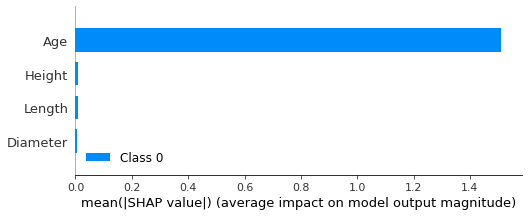

In [28]:
import shap
shap.initjs()
explainer = shap.DeepExplainer(best_model, train[:10].values)
shap_values = explainer.shap_values(test[:10].values)
shap.summary_plot(shap_values, test, plot_type='bar')